**Problem Understanding and Model Selection**

1. Problem Type: Classification
2. Problem: Sentiment Analysis

* The goal of this project is to perform sentiment analysis by classifying text data into sentiment categories such as positive or negative. Since the output variable is a categorical label, this problem is treated as a classification problem.

* To solve this problem, multiple classification models are considered. Naive Bayes is used because it performs well on text data and works efficiently with word-based features. Random Forest is applied because it combines multiple decision trees and is able to capture complex patterns in the text features.

* XGBoost is used because it is a boosting algorithm that improves sentiment classification accuracy by learning from errors of previous models, making it suitable for achieving higher performance on text classification tasks.

Dataset we will used Social Media Usage and Emotional Well-Being
https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being/

In [20]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df=pd.read_csv('../Dataset/train.csv')
df_test = pd.read_csv("../Dataset/test.csv")



In [22]:
# Final dataset
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


#### **Perform the EDA**

In [23]:
# Check the shape
print(f'EDA.....\n{'='*100}')
print(f'Shape is :\n{df.shape}\n{'='*100}')
print(f'{df.info()}\n{'='*100}') # info check
print(f'{df.describe()}\n{'='*100}')
print(f'{df.isna().sum()}\n{'='*100}')

EDA.....
Shape is :
(1001, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB
None
       Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
count                 1000.000000    1000.00

conclusion:
* Here are the 1104 rows and 10 columns
* The User_ID and Age datatype are wrong
* The dataset shows moderate to high daily social media usage with increasing engagement levels, indicating that user activity features can be effectively used to predict dominant emotional states.
* Here are a only 1 missing values we will drop it

In [24]:
# Check the unique values of each feature
for col in df.columns:
    print('Unique values of :',col)
    print(f'{df[col].unique()}\n{'='*100}')

# Check the unique values of each feature
for col in df.columns:
    print('Unique values of :',col)
    print(f'{df[col].value_counts(normalize=True)*100}\n{'='*100}')

Unique values of : User_ID
['1' '2' '3' ... '998' '999' '1000']
Unique values of : Age
['25' '30' '22' '28' '33' '21' '27' '24' '29' '31' '23' '26' '34' '35'
 '32' 'Male' 'Female' 'Non-binary'
 ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
Unique values of : Gender
['Female' 'Male' 'Non-binary' '27' '24' '29' '33' '31' '22' '25' '28' '30'
 '23' '34' '26' '35' '21' '32' nan]
Unique values of : Platform
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat' nan]
Unique values of : Daily_Usage_Time (minutes)
[120.  90.  60. 200.  45. 150.  85. 110.  55. 170.  75.  95.  65. 180.
 100.  40. 125.  50. 140. 105. 190.  70.  80. 160. 145. 130. 115. 175.
 165. 155.  nan]
Unique values of : Posts_Per_Day
[ 3.  5.  2.  8.  1.  4.  6.  7. nan]
Unique values of : Likes_Received_Per_Day
[ 45.  20.  15. 100.   5.  60.  30.  25.  10.  80.  35.  12.  90.  40.
  55.  33.   8.  70.  28.  11.  95.  18.   9.  85.  38.   6.  13.  75.
  27.  88.  22.  78.  29.  50.  36.  72. 

Overall conclsion

* User_ID → numeric, no issues.

* Age and Gender → need data cleaning.

* Platform and other numeric columns → clean, ready for preprocessing.

* Dominant_Emotion → target, encode as labels for modeling.

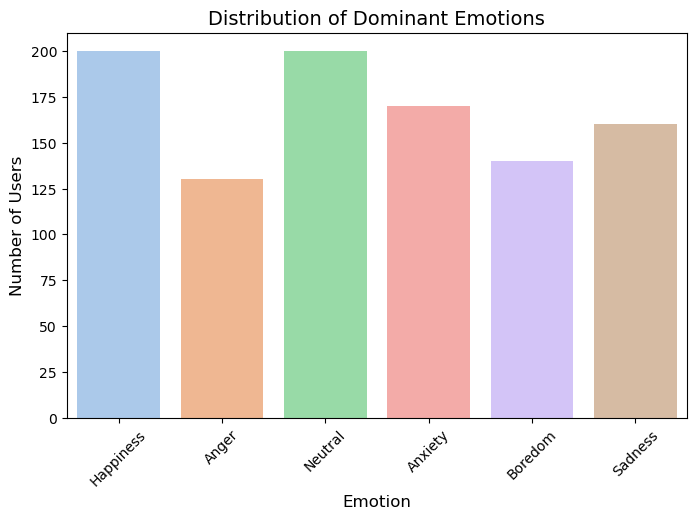

In [25]:
# Count plot for Dominant_Emotion
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Dominant_Emotion', palette='pastel',)
plt.title('Distribution of Dominant Emotions', fontsize=14)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.show()

conclusion:“The count plot shows that most users are in Neutral or Happy states, while fewer users are Angry or Bored, giving insight into the distribution of dominant emotions.”

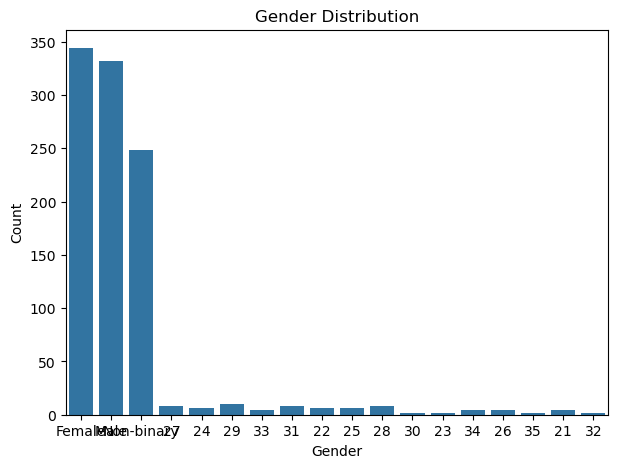

In [26]:
# Plot gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

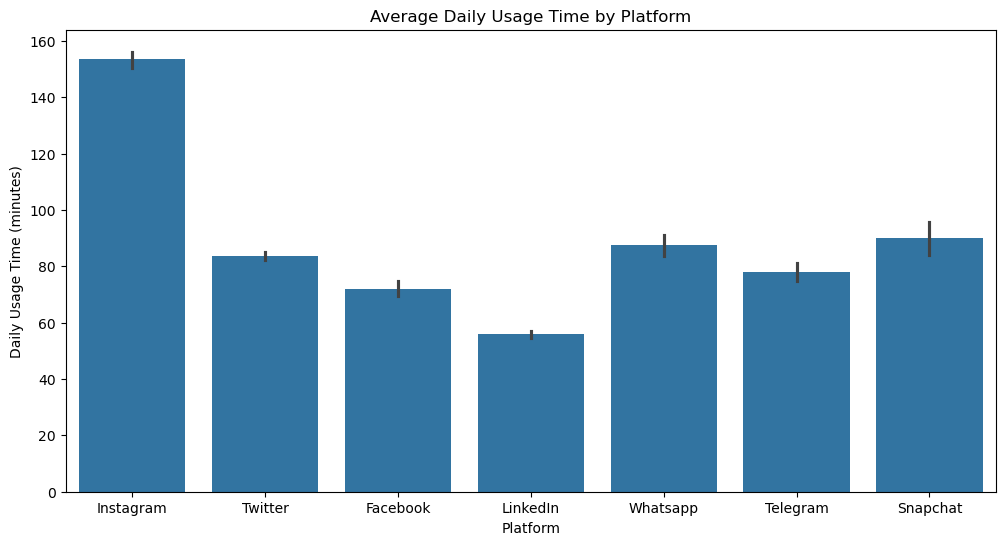

In [27]:
# Plot average daily usage time by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

### **Clean the dataset**

In [28]:
# Handle the missing values\
df=df.dropna()
# Recheck their are missing value present or not
df.isna().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [34]:
def clean_dataset(df, age_median, gender_mode):
    """
    Cleans the social media sentiment dataset.
    
    Parameters:
    df (DataFrame): Input dataset (train or test)
    age_median (float): Median age computed from TRAIN data
    gender_mode (str): Most frequent gender from TRAIN data
    
    Returns:
    DataFrame: Cleaned dataset
    """
    
    df = df.copy()

    # Drop User_ID (not useful for modeling)
    df.drop('User_ID', axis=1, inplace=True, errors='ignore')

    # ---- Age Cleaning 
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df['Age'].fillna(age_median, inplace=True)
    df['Age'] = df['Age'].astype(int)

    # ---- Gender Cleaning 
    valid_genders = ['Male', 'Female', 'Non-binary']
    df['Gender'] = df['Gender'].where(
        df['Gender'].isin(valid_genders), pd.NA
    )
    df['Gender'].fillna(gender_mode, inplace=True)

    return df


In [35]:
age_median = pd.to_numeric(df['Age'], errors='coerce').median()
gender_mode = df.loc[
    df['Gender'].isin(['Male', 'Female', 'Non-binary']), 'Gender'
].mode()[0]


In [37]:
# CLean the Train dataset
df_train_clean = clean_dataset(df, age_median, gender_mode)

# Clean the Test datset
df_test_clean = clean_dataset(df_test, age_median, gender_mode)


In [38]:
df_train_clean.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [39]:
df_test_clean.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,27,Female,Snapchat,120,4,40,18,22,Neutral
1,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,27,Male,Telegram,105,3,48,20,28,Anxiety
4,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [40]:
# save the Clean dataset
df_train_clean.to_csv('../Dataset/clean_train_data.csv', index=False)
df_test_clean.to_csv('../Dataset/clean_test_data.csv', index=False)
